In [54]:

WEBSITE = "https://google.com"
TABLE = "ping-websites"
MAX_RESULTS = 10

In [55]:
import boto3
from boto3.dynamodb.conditions import Attr
from datetime import datetime

dynamodb = boto3.resource("dynamodb")
table = dynamodb.Table(TABLE)

scan = table.scan(
    FilterExpression=Attr('website').eq(WEBSITE)
)['Items']

In [56]:
# Sort the results by timestamp
scan.sort(key=lambda item: datetime.strptime(item['time'], "%Y-%m-%dT%H:%M:%SZ"))

In [57]:
# Split to Time vs HttpCode
keys = [item['time'] for item in scan][:MAX_RESULTS]
values = [item['httpCode'] for item in scan][:MAX_RESULTS]

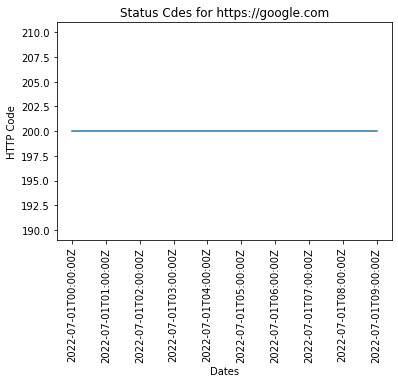

In [58]:
import matplotlib.pyplot as plt
  
plt.plot(keys, values)
  
plt.xlabel('Dates')
plt.xticks(rotation=90)

plt.ylabel('HTTP Code')

plt.title('Status Codes for %s' % WEBSITE)

plt.show()